In [26]:
# import the libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [27]:
# read and load our data 
df = pd.read_csv('owid-covid-data.csv')

In [3]:
# check the head of the data

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# display the columns of the dataset
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# display the shape of the dataset

df.shape

(402717, 67)

In [11]:
# display the info of the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402717 entries, 0 to 402716
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    402717 non-null  object        
 1   continent                                   383454 non-null  object        
 2   location                                    402717 non-null  object        
 3   date                                        402717 non-null  datetime64[ns]
 4   total_cases                                 363712 non-null  float64       
 5   new_cases                                   391526 non-null  float64       
 6   new_cases_smoothed                          390296 non-null  float64       
 7   total_deaths                                341117 non-null  float64       
 8   new_deaths                                  391897 non-null  float64      

In [28]:
# convert the date column to datetime type

df['date'] = pd.to_datetime(df['date'])

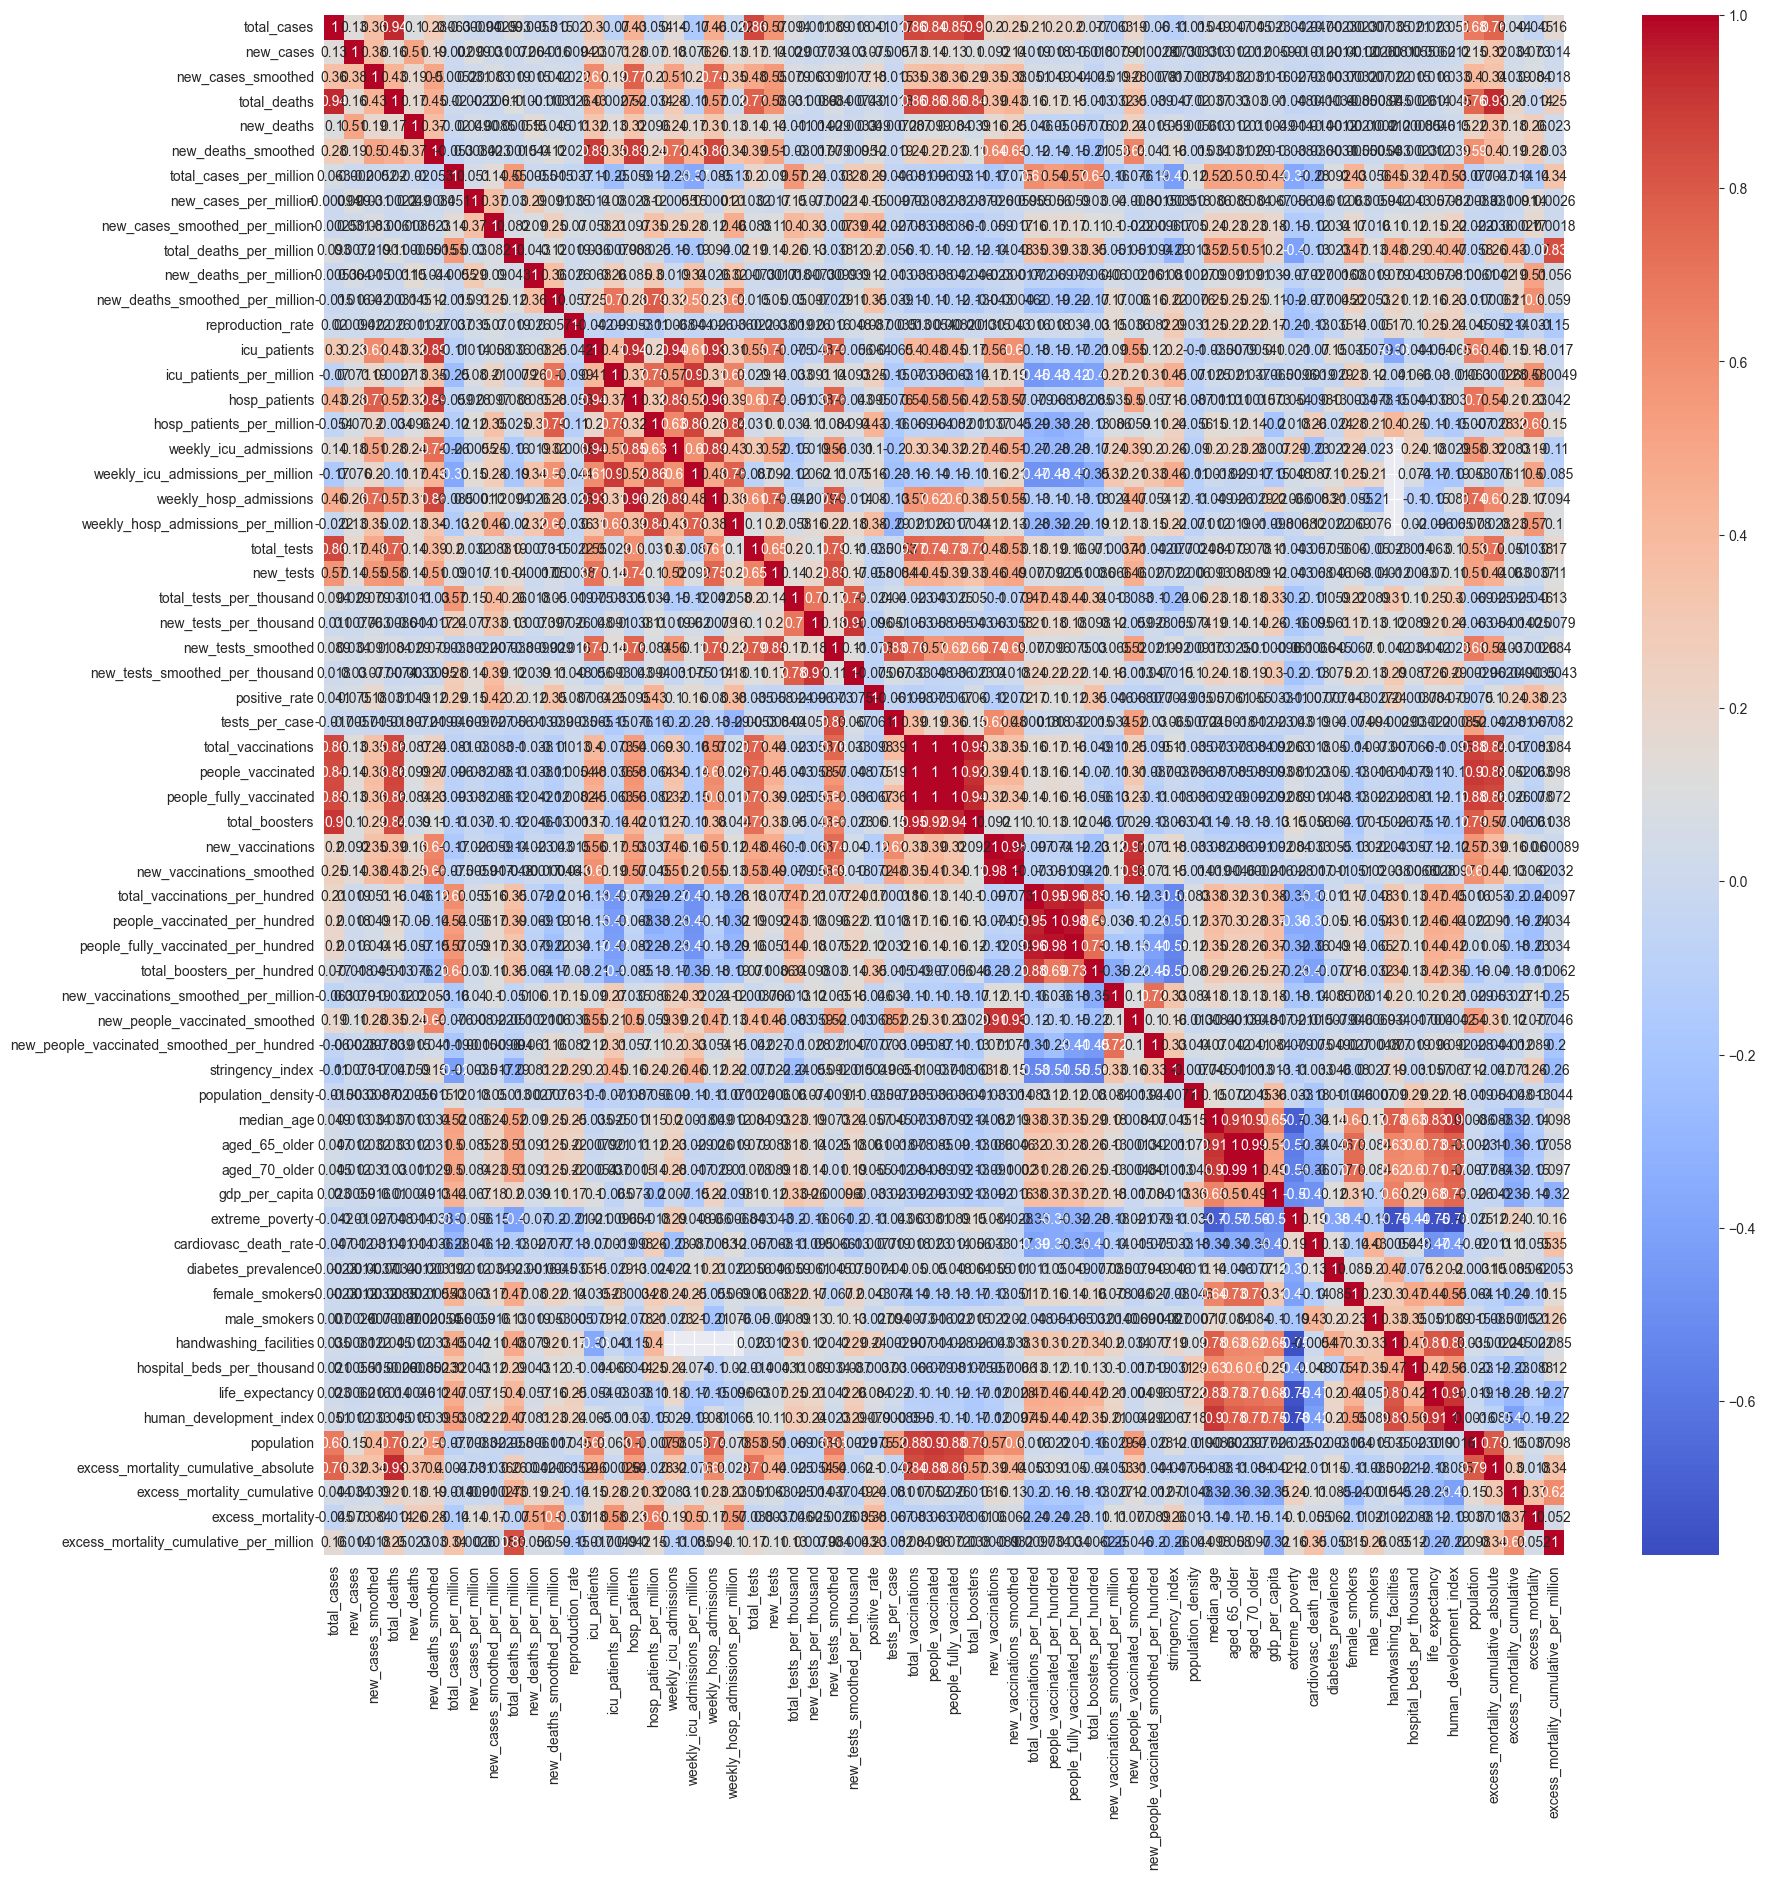

In [29]:
# create heatmap in order to help us to choose the features based on the correlation with the target column (new_deaths)
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['total_cases', 'new_cases',
                     'new_cases_smoothed', 'total_deaths', 'new_deaths',
                     'new_deaths_smoothed', 'total_cases_per_million',
                     'new_cases_per_million', 'new_cases_smoothed_per_million',
                     'total_deaths_per_million', 'new_deaths_per_million',
                     'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
                     'icu_patients_per_million', 'hosp_patients',
                     'hosp_patients_per_million', 'weekly_icu_admissions',
                     'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
                     'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
                     'total_tests_per_thousand', 'new_tests_per_thousand',
                     'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
                     'positive_rate', 'tests_per_case', 'total_vaccinations',
                     'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
                     'new_vaccinations', 'new_vaccinations_smoothed',
                     'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                     'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
                     'new_vaccinations_smoothed_per_million',
                     'new_people_vaccinated_smoothed',
                     'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
                     'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
                     'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
                     'diabetes_prevalence', 'female_smokers', 'male_smokers',
                     'handwashing_facilities', 'hospital_beds_per_thousand',
                     'life_expectancy', 'human_development_index', 'population',
                     'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
                     'excess_mortality', 'excess_mortality_cumulative_per_million']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [30]:
# replace NaN values with zero

df = df.fillna(0)

In [31]:
# choose the desired columns as inputs based on the correlation with the target column (new_deaths)

features = ['new_cases', 'new_deaths_smoothed', 'icu_patients', 'hosp_patients', 'weekly_hosp_admissions',
            'excess_mortality_cumulative_absolute']

df[features]

,new_cases,new_deaths_smoothed,icu_patients,hosp_patients,weekly_hosp_admissions,excess_mortality_cumulative_absolute
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
402712,0.0,0.0,0.0,0.0,0.0,0.0
402713,0.0,0.0,0.0,0.0,0.0,0.0
402714,0.0,0.0,0.0,0.0,0.0,0.0
402715,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# store the target (new_deaths) into variable

target_column = 'new_deaths'

In [34]:
# split our data into winter months (12-1-2) and spring months (3-4-5)

winter_months = df[df['date'].dt.month.isin([12, 1, 2])]
spring_months = df[df['date'].dt.month.isin([3, 4, 5])]

In [33]:
# display the winter months values and spring months values 

# winter months

winter_months

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402632,ZWE,Africa,Zimbabwe,2024-02-25,266355.0,5.0,0.714,5739.0,2.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
402633,ZWE,Africa,Zimbabwe,2024-02-26,266355.0,0.0,0.714,5739.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
402634,ZWE,Africa,Zimbabwe,2024-02-27,266355.0,0.0,0.714,5739.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
402635,ZWE,Africa,Zimbabwe,2024-02-28,266355.0,0.0,0.714,5739.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0


In [25]:
# spring months

spring_months

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
56,AFG,Asia,Afghanistan,2020-03-01,1.0,1.0,0.143,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
57,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.143,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
58,AFG,Asia,Afghanistan,2020-03-03,1.0,0.0,0.143,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
59,AFG,Asia,Afghanistan,2020-03-04,1.0,0.0,0.143,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
60,AFG,Asia,Afghanistan,2020-03-05,1.0,0.0,0.143,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402712,ZWE,Africa,Zimbabwe,2024-05-15,266362.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
402713,ZWE,Africa,Zimbabwe,2024-05-16,266362.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
402714,ZWE,Africa,Zimbabwe,2024-05-17,266362.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
402715,ZWE,Africa,Zimbabwe,2024-05-18,266362.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0


In [35]:
# store the feature values to the x_winter and x_spring

x_winter = winter_months[features]
x_spring = spring_months[features]

In [47]:
# display the current winter-spring data

x_winter

,new_cases,new_deaths_smoothed,icu_patients,hosp_patients,weekly_hosp_admissions,excess_mortality_cumulative_absolute
0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0,0.000,0.0,0.0,0.0,0.0
4,0.0,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
402632,5.0,0.286,0.0,0.0,0.0,0.0
402633,0.0,0.286,0.0,0.0,0.0,0.0
402634,0.0,0.286,0.0,0.0,0.0,0.0
402635,0.0,0.286,0.0,0.0,0.0,0.0


In [48]:
x_spring

,new_cases,new_deaths_smoothed,icu_patients,hosp_patients,weekly_hosp_admissions,excess_mortality_cumulative_absolute
56,1.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
402712,0.0,0.0,0.0,0.0,0.0,0.0
402713,0.0,0.0,0.0,0.0,0.0,0.0
402714,0.0,0.0,0.0,0.0,0.0,0.0
402715,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# store the target values ('new_deaths') to the y_winter and y_spring

y_winter = winter_months[target_column]
y_spring = spring_months[target_column]

In [51]:
# display the y values for winter and spring

y_winter

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
402632    2.0
402633    0.0
402634    0.0
402635    0.0
402636    0.0
Name: new_deaths, Length: 104738, dtype: float64

In [39]:
y_spring

56        0.0
57        0.0
58        0.0
59        0.0
60        0.0
         ... 
402712    0.0
402713    0.0
402714    0.0
402715    0.0
402716    0.0
Name: new_deaths, Length: 113043, dtype: float64

In [37]:
# split the data to training and testing sets

x_winter_train, x_winter_test, y_winter_train, y_winter_test = train_test_split(x_winter, y_winter, test_size=0.2,
                                                                                random_state=42)

x_spring_train, x_spring_test, y_spring_train, y_spring_test = train_test_split(x_spring, y_spring, test_size=0.2,

                                                                                random_state=42)


In [38]:
# scale the data using MinMaxScaler

scaler = MinMaxScaler()

x_winter_train = scaler.fit_transform(x_winter_train)
x_winter_test = scaler.transform(x_winter_test)

x_spring_train = scaler.fit_transform(x_spring_train)
x_spring_test = scaler.transform(x_spring_test)

In [42]:
# Verify the shapes before reshaping
print(f'x_winter_train shape before reshaping: {x_winter_train.shape}')
print(f'x_winter_test shape before reshaping: {x_winter_test.shape}')
print(f'x_spring_train shape before reshaping: {x_spring_train.shape}')
print(f'x_spring_test shape before reshaping: {x_spring_test.shape}')

x_winter_train shape before reshaping: (83790, 6)
x_winter_test shape before reshaping: (20948, 6)
x_spring_train shape before reshaping: (90434, 6)
x_spring_test shape before reshaping: (22609, 6)


In [39]:
# Reshape data for LSTM model
# LSTM expects the input data to be in the shape of (samples, time steps, features)
x_winter_train = np.reshape(x_winter_train, (x_winter_train.shape[0], 1, x_winter_train.shape[1]))
x_winter_test = np.reshape(x_winter_test, (x_winter_test.shape[0], 1, x_winter_test.shape[1]))
x_spring_train = np.reshape(x_spring_train, (x_spring_train.shape[0], 1, x_spring_train.shape[1]))
x_spring_test = np.reshape(x_spring_test, (x_spring_test.shape[0], 1, x_spring_test.shape[1]))

print(f'x_winter_train shape after reshaping: {x_winter_train.shape}')
print(f'x_winter_test shape after reshaping: {x_winter_test.shape}')
print(f'x_spring_train shape after reshaping: {x_spring_train.shape}')
print(f'x_spring_test shape after reshaping: {x_spring_test.shape}')

x_winter_train shape after reshaping: (83790, 1, 6)
x_winter_test shape after reshaping: (20948, 1, 6)
x_spring_train shape after reshaping: (90434, 1, 6)
x_spring_test shape after reshaping: (22609, 1, 6)


In [50]:
# create the model for the winter dataset

winter_model = Sequential()
winter_model.add(LSTM(50, return_sequences=True, input_shape=(1, x_winter_train.shape[2])))
# winter_model.add(Dropout(0.2))
winter_model.add(LSTM(50, return_sequences=True))
# winter_model.add(Dropout(0.2))
winter_model.add(LSTM(50, return_sequences=False))
# winter_model.add(Dropout(0.2))
winter_model.add(Dense(1))

# compile the model

winter_model.compile(optimizer='adam', loss='mean_squared_error')

# create early stopping to avoid overfitting

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# train the model

winter_model.fit(x=x_winter_train, y=y_winter_train, epochs=100, batch_size=32,
                 validation_data=(x_winter_test, y_winter_test), callbacks=[early_stopping])

# predict and evaluate the winter model

y_winter_pred = winter_model.predict(x_winter_test)

# calculate the MAE and RMSE of the winter model

MAE_winter = mean_absolute_error(y_winter_test, y_winter_pred)
RMSE_winter = np.sqrt(mean_squared_error(y_winter_test, y_winter_pred))

# display the winter errors

print(f'Winter MAE: {MAE_winter}, Winter RMSE: {RMSE_winter}')

Epoch 1/100


C:\Users\nick-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2619/2619 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 2135672.2500 - val_loss: 4295898.0000
Epoch 2/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2158657.5000 - val_loss: 4290095.0000
Epoch 3/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2660511.2500 - val_loss: 4284943.0000
Epoch 4/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2134048.0000 - val_loss: 4279723.0000
Epoch 5/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2591204.2500 - val_loss: 4274679.0000
Epoch 6/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 2499229.0000 - val_loss: 4269757.5000
Epoch 7/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 2563575.2500 - val_loss: 4264530.5000
Epoch 8/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2211853.2500 - val_loss: 4258302.0000
Epoch 9/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2295445.2500 - val_loss: 4253393.0000
Epoch 10/100
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1870771.8750 - val_loss: 4247

In [51]:
# create the model for the spring dataset

spring_model = Sequential()
spring_model.add(LSTM(50, return_sequences=True, input_shape=(1, x_winter_train.shape[2])))
# spring_model.add(Dropout(0.2))
spring_model.add(LSTM(50, return_sequences=True))
# spring_model.add(Dropout(0.2))
spring_model.add(LSTM(50, return_sequences=False))
# spring_model.add(Dropout(0.2))
spring_model.add(Dense(1))

# compile the model

spring_model.compile(optimizer='adam', loss='mean_squared_error')

# train the model

spring_model.fit(x=x_spring_train, y=y_spring_train, epochs=100, batch_size=32,
                 validation_data=(x_spring_test, y_spring_test), callbacks=[early_stopping])

# predict and evaluate the spring model

y_spring_pred = spring_model.predict(x_spring_test)

# calculate the MAE and RMSE of the spring model

MAE_spring = mean_absolute_error(y_spring_test, y_spring_pred)
RMSE_spring = np.sqrt(mean_squared_error(y_spring_test, y_spring_pred))

# display the spring errors

print(f'Spring MAE: {MAE_spring}, Spring RMSE: {RMSE_spring}')

C:\Users\nick-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 1683409.3750 - val_loss: 1598558.8750
Epoch 2/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1762971.1250 - val_loss: 1594807.1250
Epoch 3/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1711458.7500 - val_loss: 1591386.0000
Epoch 4/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1551366.7500 - val_loss: 1588196.1250
Epoch 5/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1849731.8750 - val_loss: 1585143.8750
Epoch 6/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 2180564.2500 - val_loss: 1582131.6250
Epoch 7/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1315900.7500 - val_loss: 1577795.3750
Epoch 8/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1641300.8750 - val_loss: 1574683.5000
Epoch 9/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1681737.2500 - val_loss: 1571475.5000
Epoch 10/100
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 1869480.3750 - va

In [52]:
# create the table using dataframe

# create a dict with the results of errors and the right column names
my_data = {
    "": ['Mean Absolute Error (MAE)', "Root Mean Squared Error (RMSE)"],
    "Winter Month": [MAE_winter, RMSE_winter],
    "Spring Month": [MAE_spring, RMSE_spring]
}

# create the dataframe
dataFrame = pd.DataFrame(my_data)

# display the dataframe
dataFrame

,,Winter Month,Spring Month
0,Mean Absolute Error (MAE),85.285289,50.622913
1,Root Mean Squared Error (RMSE),1964.104074,1155.639819
